# Setup and install for MNIST

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=f91b65caf7fe1ca56228efd156519c11694fc211c46a6845159e06fc3dc48633
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar


In [3]:
%pip install gpflow
%pip install plotnine

     |████████████████████████████████| 334 kB 14.7 MB/s 
     |████████████████████████████████| 104 kB 78.2 MB/s 
     |████████████████████████████████| 462 kB 75.3 MB/s 


In [4]:
from plotnine import *
from plotnine.themes import *

In [5]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [45]:
paper_name = "mnist"

time: 851 µs (started: 2022-03-07 15:26:17 +00:00)


In [46]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/gp_collab/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 929 ms (started: 2022-03-07 15:26:18 +00:00)



Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.<br />
The below ```featch_mldata``` method to load MNIST returns ```data``` and ```target``` as ```uint8``` which we convert to ```float32``` and ```int64``` respectively.

The bibtex reference is:

@article{deng2012mnist,
  title={The mnist database of handwritten digit images for machine learning research},
  author={Deng, Li},
  journal={IEEE Signal Processing Magazine},
  volume={29},
  number={6},
  pages={141--142},
  year={2012},
  publisher={IEEE}
} 



In [8]:
# Set up the imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Concatenate, Add, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import  Dense, Flatten, Activation, Dropout, Embedding, Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Concatenate, BatchNormalization, GaussianNoise, AveragePooling2D
from tensorflow.keras.layers import LSTM, TimeDistributed, Permute, Reshape, Lambda, RepeatVector, Input, Multiply, SimpleRNN, GRU, LeakyReLU, Add
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.summary import create_file_writer

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


In [9]:
# %pip install RMDL

In [10]:
# Run this cell to load the dataset 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    idx = X.sample(5).index
    for i, (img, y) in enumerate(zip(X.loc[idx].to_numpy().reshape(5, 28, 28), y.loc[idx])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

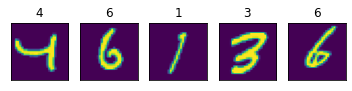

In [12]:
plot_example(X_train, y_train)

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Rescale the images from [0,255] to the [0.0,1.0] range.
X_train, X_test = X_train[..., np.newaxis]/255.0, X_test[..., np.newaxis]/255.0
X_validation = X_validation[..., np.newaxis]/255.0

# print("Number of original training examples:", len(x_train))
# print("Number of original test examples:", len(x_test))

print( X_train.shape, X_validation.shape, X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(54000, 28, 28, 1) (6000, 28, 28, 1) (10000, 28, 28, 1)


In [14]:
# np.unique(y_train.head(100))
paper_name

'gpdsl_mnist'

In [15]:
train_data = X_train
validation_data = X_validation
test_data = X_test
train_targets = y_train
validation_targets = y_validation
test_targets = y_test

In [16]:
# extracts the layer from a model using the name
def get_layer_by_name(layers, name, return_first=True):
    matching_named_layers = [l for l in layers if l.name == name]
    if not matching_named_layers:
        return None
    return matching_named_layers[0] if return_first else matching_named_layers


In [17]:
# plotting utilities for the history of the fit
def plot_history(history):
    acc_keys = [k for k in history.history.keys() if 'accuracy' in k]
    loss_keys = [k for k in history.history.keys() if not k in acc_keys]
    for k, v in history.history.items():
        if k in acc_keys:
            plt.figure(1)
            plt.plot(v)
        else:
            plt.figure(2)
            plt.plot(v)
    plt.figure(1)
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(acc_keys, loc='lower right')
    plt.figure(2)
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loss_keys, loc='upper right')
    plt.show()

def plot_history_df(history):
    acc_keys = [k for k in history.columns.values if 'accuracy' in k]
    loss_keys = [k for k in history.columns.values if not k in acc_keys and not k in ['epoch']]
    for k, v in history.items():
        if k in acc_keys:
            plt.figure(1)
            plt.plot(v)
        if k in loss_keys:
            plt.figure(2)
            plt.plot(v)
    plt.figure(1)
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(acc_keys, loc='lower right')
    plt.figure(2)
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loss_keys, loc='upper right')
    plt.show()   


A function that will take a model construction function (with _model_name_ and _input_shape_ arguments), train and fit it using the supplied data and callbacks. The _kwargs_ are supplied to the model fit function.

In [18]:
from tensorflow.keras.callbacks import CSVLogger
import datetime

def compile_and_fit_model_basic(  model_func,
                                  model_name,
                                  input_shape,
                                  X_train,
                                  Y_train,
                                  save_max_epoch=True,
                                  save_final=False,
                                  patience_count = None,
                                  early_stopping_obs = 'val_categorical_accuracy',
                                  log_history = True,
                                  verbose_level = 0,
                                  **kwargs):
    m = None
    if isinstance(model_func, tf.keras.models.Model):
        m = model_func
        m._name = model_name
    else:
        m = model_func(model_name, input_shape)
      
    if 'validation_data' not in kwargs.keys() and 'val_' in early_stopping_obs:
        early_stopping_obs = early_stopping_obs.replace('val_','')

    callbacks_used = []
    if save_max_epoch:
        callbacks_used.append(ModelCheckpoint(f'/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{m.name}' + '_model_{epoch:03d}_{accuracy:0.3f}',
                                              save_weights_only=False,
                                              monitor = early_stopping_obs,
                                              mode='max',
                                              save_best_only=True))
    if patience_count is not None:
        callbacks_used.append(tf.keras.callbacks.EarlyStopping(monitor=early_stopping_obs, patience=patience_count))

    if log_history:
        callbacks_used.append(tf.keras.callbacks.CSVLogger(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/history_log_{model_name}_{datetime.date.today().strftime('%Y%m%d')}.csv", append=True))

    m.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

    # m.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    #           optimizer=tf.keras.optimizers.Adam(), 
    #           metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
# model.compile(optimizer='adam', # learning rate will be set by LearningRateScheduler
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

    history = m.fit(X_train, Y_train, callbacks=callbacks_used, verbose=verbose_level, **kwargs)
    if save_final:
        make_dir_if_not_exist(model_name)
        m.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{m.name}_saved_model_after_fit")  # Save the model
    return (m, history)

Some functions to get scores on the results

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import re

def get_confusion_matrix_classification(model, X, Y_true):
    y_pred = model.predict(X)
    y_true = np.apply_along_axis(np.argmax, 1, Y_true)
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred)
    return (confusion_matrix(y_true, y_pred), y_pred, y_true)

def construct_confusion_matrix(X, Y_true, Y_pred):
    y_true = Y_true
    y_pred = np.apply_along_axis(np.argmax, 1, Y_pred)
    return (confusion_matrix(y_true, y_pred), y_pred, y_true)

def pr_rc_f1_acc_from_supplied(y_pred, y_true):  
    pr, rc, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")   
    acc = accuracy_score(y_true, y_pred)
    return pr, rc, f1, acc


In [20]:
import re
import os

def dir_has_file_with_regex(dir_name, regex_string):
  filenames = [ f"{dir_name}/{dir_entry.name}" for dir_entry in os.scandir(dir_name) if os.path.isfile(f"{dir_name}/{dir_entry.name}") ]   
  filenames = [ fn for fn in filenames if re.match(regex_string, fn, re.IGNORECASE) ]
  return filenames


In [21]:
# dir_has_file_with_regex("/content/drive/MyDrive/data_papers/gpSVHN/model_features", "^.*DNN_A_.*D3R_Test_X.*")

In [22]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-48ff9aee-8ed7-9dd8-73c0-a697ba53f0ba)


In [23]:
!pip install ipython-autotime

In [24]:
%load_ext autotime

time: 112 µs (started: 2022-03-07 15:15:33 +00:00)


In [25]:
import timeit

time: 755 µs (started: 2022-03-07 15:15:34 +00:00)


In [ ]:
# what is the tune?

# Imports

In [26]:
import os, re, time, json
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
AUTOTUNE = tf.data.AUTOTUNE
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.8.0
time: 33.6 ms (started: 2022-03-07 15:16:42 +00:00)


In [27]:
#@title visualization utilities [RUN ME]
"""
This cell contains helper functions used for visualization
and downloads only. You can skip reading it. There is very
little useful Keras/Tensorflow code here.
"""

# Matplotlib config
plt.rc('image', cmap='gray_r')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# pull a batch from the datasets. This code is not very nice, it gets much better in eager mode (TODO)
def dataset_to_numpy_util(training_dataset, validation_dataset, N):
  
  # get one batch from each: 10000 validation digits, N training digits
  batch_train_ds = training_dataset.unbatch().batch(N)
  
  # eager execution: loop through datasets normally
  for validation_digits, validation_labels in validation_dataset:
    validation_digits = validation_digits.numpy()
    validation_labels = validation_labels.numpy()
    break
  for training_digits, training_labels in batch_train_ds:
    training_digits = training_digits.numpy()
    training_labels = training_labels.numpy()
    break
  
  # these were one-hot encoded in the dataset
  validation_labels = np.argmax(validation_labels, axis=1)
  training_labels = np.argmax(training_labels, axis=1)
  
  return (training_digits, training_labels,
          validation_digits, validation_labels)

# create digits from local fonts for testing
def create_digits_from_local_fonts(n):
  font_labels = []
  img = PIL.Image.new('LA', (28*n, 28), color = (0,255)) # format 'LA': black in channel 0, alpha in channel 1
  font1 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'DejaVuSansMono-Oblique.ttf'), 25)
  font2 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'STIXGeneral.ttf'), 25)
  d = PIL.ImageDraw.Draw(img)
  for i in range(n):
    font_labels.append(i%10)
    d.text((7+i*28,0 if i<10 else -4), str(i%10), fill=(255,255), font=font1 if i<10 else font2)
  font_digits = np.array(img.getdata(), np.float32)[:,0] / 255.0 # black in channel 0, alpha in channel 1 (discarded)
  font_digits = np.reshape(np.stack(np.split(np.reshape(font_digits, [28, 28*n]), n, axis=1), axis=0), [n, 28*28])
  return font_digits, font_labels

# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  plt.figure(figsize=(13,3))
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)
  
# utility to display multiple rows of digits, sorted by unrecognized/recognized status
def display_top_unrecognized(digits, predictions, labels, n, lines):
  idx = np.argsort(predictions==labels) # sort order: unrecognized first
  for i in range(lines):
    display_digits(digits[idx][i*n:(i+1)*n], predictions[idx][i*n:(i+1)*n], labels[idx][i*n:(i+1)*n],
                   "{} sample validation digits out of {} with bad predictions in red and sorted first".format(n*lines, len(digits)) if i==0 else "", n)
    
# utility to display training and validation curves
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.grid(linewidth=1, color='white')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

time: 88.1 ms (started: 2022-03-07 15:16:42 +00:00)


# TPU or GPU detection

In [28]:
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines
print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of accelerators:  1
time: 3.08 s (started: 2022-03-07 15:16:45 +00:00)


# Parameters for CNN/DNN runs

In [29]:
BATCH_SIZE = 64 * strategy.num_replicas_in_sync # Gobal batch size.
# The global batch size will be automatically sharded across all
# replicas by the tf.data.Dataset API. A single TPU has 8 cores.
# The best practice is to scale the batch size by the number of
# replicas (cores). The learning rate should be increased as well.

LEARNING_RATE = 0.01
LEARNING_RATE_EXP_DECAY = 0.6 if strategy.num_replicas_in_sync == 1 else 0.7
# Learning rate computed later as LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch
# 0.7 decay instead of 0.6 means a slower decay, i.e. a faster learnign rate.

training_images_file   = 'gs://mnist-public/train-images-idx3-ubyte'
training_labels_file   = 'gs://mnist-public/train-labels-idx1-ubyte'
validation_images_file = 'gs://mnist-public/t10k-images-idx3-ubyte'
validation_labels_file = 'gs://mnist-public/t10k-labels-idx1-ubyte'

time: 3.63 ms (started: 2022-03-07 15:16:50 +00:00)


# tf.data.Dataset: parse files and prepare training and validation datasets
Please read the [best practices for building](https://www.tensorflow.org/guide/performance/datasets) input pipelines with tf.data.Dataset

In [30]:
def read_label(tf_bytestring):
    label = tf.io.decode_raw(tf_bytestring, tf.uint8)
    label = tf.reshape(label, [])
    label = tf.one_hot(label, 10)
    return label
  
def read_image(tf_bytestring):
    image = tf.io.decode_raw(tf_bytestring, tf.uint8)
    image = tf.cast(image, tf.float32)/256.0
    image = tf.reshape(image, [28*28])
    return image
  
def load_dataset(image_file, label_file):
    imagedataset = tf.data.FixedLengthRecordDataset(image_file, 28*28, header_bytes=16)
    imagedataset = imagedataset.map(read_image, num_parallel_calls=16)
    labelsdataset = tf.data.FixedLengthRecordDataset(label_file, 1, header_bytes=8)
    labelsdataset = labelsdataset.map(read_label, num_parallel_calls=16)
    dataset = tf.data.Dataset.zip((imagedataset, labelsdataset))
    return dataset 
  
def get_training_validation_dataset(image_file, label_file, batch_size):
    dataset = load_dataset(image_file, label_file)
    dataset = dataset.cache()  # this small dataset can be entirely cached in RAM
    # dataset = dataset.shuffle(5000, reshuffle_each_iteration=True)
    dataset = dataset.repeat()      # the batching will repeat infinitely if you keep doing this... bad for the features...
    validation_dataset = dataset.take(10000) 
    train_dataset = dataset.skip(10000)
    validation_dataset = validation_dataset.batch(batch_size)
    validation_dataset = validation_dataset.prefetch(AUTOTUNE)  # fetch next batches while training on the current one (-1: autotune prefetch buffer size)
    train_dataset = train_dataset.batch(batch_size)
    train_dataset = train_dataset.prefetch(AUTOTUNE)  # fetch next batches while training on the current one (-1: autotune prefetch buffer size)
    return train_dataset, validation_dataset
  
def get_test_dataset(image_file, label_file):
    dataset = load_dataset(image_file, label_file)
    dataset = dataset.cache() # this small dataset can be entirely cached in RAM
    dataset = dataset.batch(10000)
    return dataset

def get_training_validation_dataset_unrepeat(image_file, label_file, batch_size):
    dataset = load_dataset(image_file, label_file)
    dataset = dataset.cache()  # this small dataset can be entirely cached in RAM
    # dataset = dataset.shuffle(5000, reshuffle_each_iteration=True)
    # dataset = dataset.repeat()      # the batching will repeat infinitely if you keep doing this... bad for the features...
    validation_dataset = dataset.take(10000) 
    train_dataset = dataset.skip(10000)
    validation_dataset = validation_dataset.batch(batch_size)
    validation_dataset = validation_dataset.prefetch(AUTOTUNE)  # fetch next batches while training on the current one (-1: autotune prefetch buffer size)
    train_dataset = train_dataset.batch(batch_size)
    train_dataset = train_dataset.prefetch(AUTOTUNE)  # fetch next batches while training on the current one (-1: autotune prefetch buffer size)
    return train_dataset, validation_dataset

# def get_training_validation_dataset_unrepeat_rotate(image_file, label_file, batch_size):
#     dataset = load_dataset(image_file, label_file)
#     dataset = dataset.cache()  # this small dataset can be entirely cached in RAM
#     # dataset = dataset.shuffle(5000, reshuffle_each_iteration=True)
#     # dataset = dataset.repeat()      # the batching will repeat infinitely if you keep doing this... bad for the features...
#     validation_dataset = dataset.take(10000) 
#     train_dataset = dataset.skip(10000)
#     validation_dataset = validation_dataset.batch(batch_size)
#     # tf.contrib.image.rotate(images, degrees * math.pi / 180, interpolation='BILINEAR')

#     validation_dataset = validation_dataset.prefetch(AUTOTUNE)  # fetch next batches while training on the current one (-1: autotune prefetch buffer size)
#     train_dataset = train_dataset.batch(batch_size)
#     train_dataset = train_dataset.prefetch(AUTOTUNE)  # fetch next batches while training on the current one (-1: autotune prefetch buffer size)
#     return train_dataset, validation_dataset


# def get_full_training_mnist():
#     dataset = load_dataset(training_images_file, training_labels_file)
#     dataset = dataset.cache()  # this small dataset can be entirely cached in RAM
#     dataset = dataset.shuffle(5000, reshuffle_each_iteration=True)
#     dataset = dataset.repeat()
#     validation_dataset = dataset.take(10000) 
#     train_dataset = dataset.skip(10000)

# instantiate the datasets
training_dataset, validation_dataset = get_training_validation_dataset(training_images_file, training_labels_file, BATCH_SIZE)
test_dataset = get_test_dataset(validation_images_file, validation_labels_file)



time: 253 ms (started: 2022-03-07 15:16:55 +00:00)


In [31]:
training_dataset_full, test_dataset_full = get_training_validation_dataset(training_images_file, training_labels_file, BATCH_SIZE)

time: 34.7 ms (started: 2022-03-07 15:17:00 +00:00)


# Let's have a look at the data

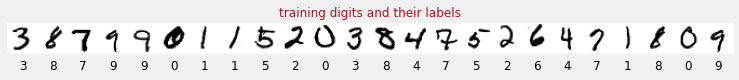

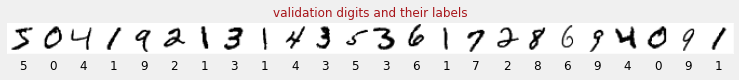

time: 3.14 s (started: 2022-03-07 15:17:04 +00:00)


In [32]:
N = 24
(training_digits, training_labels,
 validation_digits, validation_labels) = dataset_to_numpy_util(training_dataset, validation_dataset, N)
display_digits(training_digits, training_labels, training_labels, "training digits and their labels", N)
display_digits(validation_digits[:N], validation_labels[:N], validation_labels[:N], "validation digits and their labels", N)
font_digits, font_labels = create_digits_from_local_fonts(N)

# Function for writing the features and getting (un)batched data sets to be used

A function that given a model or model directory create a new model up to the _layer_name_, then write the features matching the supplied _X_ and _Y_ as numpy arrays to google drive.

In [33]:
# note the removal of the Y feature writing...
def write_features_from_models(
        model_entry,
        layer_name,
        data_set_input,
        normalize_X_func=None,
        dataset_id = "NA",
        **kwargs):
  
    model_here = None
    if isinstance(model_entry, tf.keras.models.Model):
        model_here = model_entry
        model_file_name = model_here.name
    else:
        model_here = tf.keras.models.load_model(model_entry,**kwargs) 

    features_model = Model(model_here.input,
                            get_layer_by_name(model_here.layers, layer_name).output)
    if normalize_X_func is None:
        X_new = np.array(features_model.predict(data_set_input), dtype='float64')
    else:
        X_new = np.array(normalize_X_func(features_model.predict(data_set_input)), dtype='float64')

    np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/{model_here.name}_features_{layer_name}_{dataset_id}_X", X_new, 
               allow_pickle=True, 
               fix_imports=True)
    

time: 8.01 ms (started: 2022-03-07 15:17:12 +00:00)


In [ ]:
## TOO SLOW do NOT do this

# train_ds_unbatched = training_dataset.unbatch()
# validation_ds_unbatched = validation_dataset.unbatch()
# test_ds_unbatched = test_dataset.unbatch()

# train_X_images = np.asarray(list(train_ds_unbatched.map(lambda x, y: x)))
# train_Y_labels = np.asarray(list(train_ds_unbatched.map(lambda x, y: y)))

# validation_X_images = np.asarray(list(validation_ds_unbatched.map(lambda x, y: x)))
# validation_Y_labels = np.asarray(list(validation_ds_unbatched.map(lambda x, y: y)))

# test_X_images = np.asarray(list(test_ds_unbatched.map(lambda x, y: x)))
# test_Y_labels = np.asarray(list(test_ds_unbatched.map(lambda x, y: y)))


# serving in different batch sizes, using tf.dataset makes it quicker


time: 1.65 ms (started: 2022-01-26 16:15:24 +00:00)


In [34]:
def unbatch_dataset_in_two(input_dataset):

  images = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
  labels = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)

  for x, y in input_dataset.unbatch():
    images = images.write(images.size(), x)
    labels = labels.write(labels.size(), y)

  images = tf.stack(images.stack(), axis=0)
  labels = tf.stack(labels.stack(), axis=0)

  return (images.numpy(), labels.numpy())


time: 4.94 ms (started: 2022-03-07 15:17:16 +00:00)


In [35]:
training_dataset_unrepeat, validation_dataset_unrepeat = get_training_validation_dataset_unrepeat(training_images_file, training_labels_file, BATCH_SIZE)
test_X_images, test_Y_labels = unbatch_dataset_in_two(test_dataset)
validation_X_images, validation_Y_labels = unbatch_dataset_in_two(validation_dataset_unrepeat)
train_X_images, train_Y_labels = unbatch_dataset_in_two(training_dataset_unrepeat)  

time: 30.8 s (started: 2022-03-07 15:17:18 +00:00)


In [36]:
print(train_X_images.shape, validation_X_images.shape, test_X_images.shape)
test_Y_labels = test_Y_labels.astype('int32')
validation_Y_labels = validation_Y_labels.astype('int32')
train_Y_labels = train_Y_labels.astype('int32')

test_Y_labels_as_numbers = np.apply_along_axis(np.argmax, 1, test_Y_labels)

(50000, 784) (10000, 784) (10000, 784)
time: 33 ms (started: 2022-03-07 15:18:25 +00:00)


# MNIST base CNN full data set

https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/01_MNIST_TPU_Keras.ipynb#scrollTo=56y8UNFQIVwj

In [37]:
def mnist_baseCNN_model(model_name):
    model = tf.keras.Sequential(
      [
        tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),

        tf.keras.layers.Conv2D(filters=12, kernel_size=3, padding='same', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(scale=False, center=True), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=24, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(filters=32, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, use_bias=False, name="LD1"),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4), # Dropout on dense layer only

        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model



time: 20.8 ms (started: 2022-03-07 15:18:30 +00:00)


In [38]:
def mnist_baseCNN_rotate_model(model_name):
    model = tf.keras.Sequential(
      [
        tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),
        tf.keras.layers.RandomRotation(20),  
        tf.keras.layers.Conv2D(filters=12, kernel_size=3, padding='same', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(scale=False, center=True), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=24, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(filters=32, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, use_bias=False, name="LD1"),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4), # Dropout on dense layer only

        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model

time: 19.6 ms (started: 2022-03-07 15:18:31 +00:00)


In [ ]:
EPOCHS = 250
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(2)]:
  start_time = timeit.default_timer()
  # model_name = f"FULLCONVNN_MNIST_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}"
  # m = mnist_baseCNN_model(model_name)
  model_name = f"FULLCONVNNROT20_MNIST_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}"
  m = mnist_baseCNN_rotate_model(model_name)
  print(m.name)
  m.compile(optimizer='adam', # learning rate will be set by LearningRateScheduler
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = m.fit(training_dataset_full,
                      steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                      validation_steps=1, verbose=1,
                      callbacks=[lr_decay])
  print(timeit.default_timer()-start_time)
  m.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{m.name}_saved_model_after_fit")  # Save the model

In [ ]:
# m.predict(validation_dataset)
# m.predict(test_dataset)
m.evaluate(test_X_images, test_Y_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9820


[0.055545177310705185, 0.9819999933242798]

time: 1 s (started: 2022-01-24 20:52:46 +00:00)


# MNIST base CNN

https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/01_MNIST_TPU_Keras.ipynb#scrollTo=56y8UNFQIVwj

In [ ]:
def mnist_baseCNN_model(model_name):
    model = tf.keras.Sequential(
      [
        tf.keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1), name="image"),

        tf.keras.layers.Conv2D(filters=12, kernel_size=3, padding='same', use_bias=False), # no bias necessary before batch norm
        tf.keras.layers.BatchNormalization(scale=False, center=True), # no batch norm scaling necessary before "relu"
        tf.keras.layers.Activation('relu'), # activation after batch norm

        tf.keras.layers.Conv2D(filters=24, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Conv2D(filters=32, kernel_size=6, padding='same', use_bias=False, strides=2),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, use_bias=False, name="LD1"),
        tf.keras.layers.BatchNormalization(scale=False, center=True),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4), # Dropout on dense layer only

        tf.keras.layers.Dense(10, activation='softmax', name="SFTMX")
      ])

    model._name = model_name
     # Going back and forth between TPU and host is expensive. Better to run 128 batches on the TPU before reporting back.
    return model



time: 19.6 ms (started: 2022-01-22 18:11:12 +00:00)


In [ ]:
EPOCHS = 20
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+2 for i in range(40)]:
  start_time = timeit.default_timer()
  model_name = f"CNN_MNIST_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}"
  m = mnist_baseCNN_model(model_name)
  print(m.name)
  m.compile(optimizer='adam', # learning rate will be set by LearningRateScheduler
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = m.fit(training_dataset,
                      steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                      validation_data=validation_dataset, validation_steps=1, verbose=0,
                      callbacks=[lr_decay])
  print(timeit.default_timer()-start_time)
  m.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{m.name}_saved_model_after_fit")  # Save the model

In [ ]:
# m.predict(validation_dataset)
# m.predict(test_dataset)

In [ ]:
# write training features
check_model_string = "CNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
        print(dir_entry.name)
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "LD1",
              train_X_images,
              normalize_X_func=None,
              dataset_id = "Train")
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "SFTMX",
              train_X_images,
              normalize_X_func=None,
              dataset_id = "Train")


In [ ]:
# write validation features
check_model_string = "CNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
        print(dir_entry.name)
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "LD1",
              validation_X_images,
              normalize_X_func=None,
              dataset_id = "Validation")
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "SFTMX",
              validation_X_images,
              normalize_X_func=None,
              dataset_id = "Validation")
          
        

In [ ]:
# write test features
check_model_string = "CNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
        print(dir_entry.name)
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "LD1",
              test_X_images,
              normalize_X_func=None,
              dataset_id = "Test")
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "SFTMX",
              test_X_images,
              normalize_X_func=None,
              dataset_id = "Test")


# MNIST Base DNN

In [ ]:
def get_mnist_dnn(model_name, input_size = 784, hidden_neurons = 400, classes =10):
  model = Sequential()     
  model.add(Dense(hidden_neurons, input_dim=input_size, activation='relu', name="LD1")) 
  model.add(Dense(classes, input_dim=hidden_neurons, activation='softmax', name="SFTMX")) 
  model._name = model_name
  return model


time: 2.91 ms (started: 2022-01-24 15:12:47 +00:00)


In [ ]:
EPOCHS = 15
steps_per_epoch = 60000//BATCH_SIZE  # 60,000 items in this dataset
print("Steps per epoch: ", steps_per_epoch)

lr_decay = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: LEARNING_RATE * LEARNING_RATE_EXP_DECAY**epoch,
    verbose=False)

for model_count in [i+1 for i in range(80)]:
  start_time = timeit.default_timer()
  model_name = f"DNN_MNIST_{str(model_count)}_{datetime.datetime.now():%Y%m%d%H%M%S}"
  m = get_mnist_dnn(model_name)
  print(m.name)
  m.compile(optimizer='adam', # learning rate will be set by LearningRateScheduler
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = m.fit(training_dataset,
                      steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                      validation_data=validation_dataset, validation_steps=1, verbose=0,
                      callbacks=[lr_decay])
  print(timeit.default_timer()-start_time)
  m.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{m.name}_saved_model_after_fit")  # Save the model

In [ ]:
# write training features
check_model_string = "DNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
        print(dir_entry.name)
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "LD1",
              train_X_images,
              normalize_X_func=None,
              dataset_id = "Train")
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "SFTMX",
              train_X_images,
              normalize_X_func=None,
              dataset_id = "Train")


In [ ]:
# write validation features
check_model_string = "DNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
        print(dir_entry.name)
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "LD1",
              validation_X_images,
              normalize_X_func=None,
              dataset_id = "Validation")
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "SFTMX",
              validation_X_images,
              normalize_X_func=None,
              dataset_id = "Validation")
          
        

In [ ]:
# write test features
check_model_string = "DNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      if not dir_has_file_with_regex(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features",f".*{dir_entry.name.replace('_saved_model_after_fit','')}.*_features_DRP1_Train.*$"):
        print(dir_entry.name)
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "LD1",
              test_X_images,
              normalize_X_func=None,
              dataset_id = "Test")
        write_features_from_models(
              f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}",
              "SFTMX",
              test_X_images,
              normalize_X_func=None,
              dataset_id = "Test")


In [ ]:
# getting the scores for the individual DNNs on the test data set
scores_dnn_simple = []
check_model_string = "DNN_MNIST_"
not_check_model_string = ["arallel","Collab_"]
for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/"):
  if os.path.isdir(dir_entry):
    if check_model_string in str(dir_entry) and all([ (not ncs in dir_entry.name) for ncs in not_check_model_string]):
      print(dir_entry.name)
      # model_here = tf.keras.models.load_model(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}")  
      # y_predict_here = np.array(model_here.predict(test_data_grey), dtype='float64')
      # y_predict_here = np.apply_along_axis(np.argmax, 1, y_predict_here)
      # scores_dnn_simple.append(pr_rc_f1_acc_from_supplied(y_predict_here, test_targets))

# np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/individual_dnn_summary_{datetime.datetime.now():%Y%m%d%H%M%S}", np.array(scores_dnn_simple), 
#                allow_pickle=True, 
#                fix_imports=True)

# Set up the models + features file lists for CNN/DNN splits for reuse MNIST

In [39]:
acceptable_string_grabs = [ "CNN_MNIST_", "DNN_MNIST_"]
not_check_model_string = ["arallel","Collab_"]

model_dirs = [  f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{dir_entry.name}" 
                for dir_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/") 
                if os.path.isdir(dir_entry) and any(xs in dir_entry.name for xs in acceptable_string_grabs) ]

dnn_model_dirs = [ s for s in model_dirs if "DNN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 
cnn_model_dirs = [ s for s in model_dirs if "CNN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 

model_features_files = [  f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/{file_entry.name}" 
                for file_entry in os.scandir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/") 
                if os.path.isfile(file_entry) and any(xs in file_entry.name for xs in acceptable_string_grabs) ]

dnn_features_files = [ s for s in model_features_files if "DNN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 
cnn_features_files = [ s for s in model_features_files if "CNN" in s and all([ (not ncs in s) for ncs in not_check_model_string])] 

dnn_identifier = acceptable_string_grabs[1]

cnn_identifier = acceptable_string_grabs[0]

def avgfilter_ensemble_predictions(y_pred_ms, xtest):
  y_preds_ens_prb = np.apply_along_axis(np.mean, 0, y_pred_ms)
  y_preds_ens_idx = np.apply_along_axis(np.argmax, 1, y_preds_ens_prb) 
  # y_preds_ens_idx = y_preds_ens_idx + 1
  return y_preds_ens_idx  




time: 23.1 ms (started: 2022-03-07 15:19:11 +00:00)


# Set up data for ensemble plot collection

In [40]:
# set up the data
ensemble_test_results = None

time: 874 µs (started: 2022-03-07 15:19:17 +00:00)


In [41]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!
time: 3.05 ms (started: 2022-03-07 15:19:18 +00:00)


# Functions for collaborative learning (no GP) based on last dense and softmax layer features for DNN/CNN inputs

A sequential model for DNN on collaborative features

In [42]:
def model_combination_of_features(model_name, input_shape,num_classes=10):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        BatchNormalization(),
        Dense(256, kernel_initializer='RandomNormal', bias_initializer='zeros'),
        LeakyReLU(),
        Dropout(0.6),
        Dense(128, kernel_initializer='RandomNormal', bias_initializer='zeros', kernel_regularizer = tf.keras.regularizers.l1(1e-3)),
        LeakyReLU(),
        Dropout(0.6),
        Dense(32, kernel_initializer='RandomNormal', bias_initializer='zeros', kernel_regularizer = tf.keras.regularizers.l1(1e-2)),
        LeakyReLU(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ], name=model_name)
    return model


def model_combination_of_features_with_flatten(model_name, input_shape,num_classes=10):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        Flatten(),
        BatchNormalization(),
        Dense(256, kernel_initializer='RandomNormal', bias_initializer='zeros'),
        LeakyReLU(),
        Dropout(0.6),
        Dense(128, kernel_initializer='RandomNormal', bias_initializer='zeros', kernel_regularizer = tf.keras.regularizers.l1(1e-3)),
        LeakyReLU(),
        Dropout(0.6),
        Dense(32, kernel_initializer='RandomNormal', bias_initializer='zeros', kernel_regularizer = tf.keras.regularizers.l1(1e-2)),
        LeakyReLU(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ], name=model_name)
    return model    


# X_trains_out.append(np.array(features_model.predict(X_train_combined), dtype='float64'))
# X_train_new = np.concatenate(tuple(X_trains_out), axis=1)


time: 15 ms (started: 2022-03-07 15:20:04 +00:00)


In [43]:
def get_features_from_multiple_models(feature_files, axis_to_concat = 1):
 
  validation_features_to_load = [ff for ff in feature_files if "Validation" in ff and "_X" in ff ]
  np_x_validation_collab = np.array([np.load(ff) for ff in validation_features_to_load])
  np_x_validation_collab = np.concatenate(np_x_validation_collab, axis=axis_to_concat)

  train_features_to_load = [ff.replace("Validation", "Train") for ff in validation_features_to_load]
  np_x_train_collab = np.array([np.load(ff) for ff in train_features_to_load])
  np_x_train_collab = np.concatenate(np_x_train_collab, axis=axis_to_concat)

  test_features_to_load = [ff.replace("Validation", "Test") for ff in validation_features_to_load]
  np_x_test_collab = np.array([np.load(ff) for ff in test_features_to_load])
  np_x_test_collab = np.concatenate(np_x_test_collab, axis=axis_to_concat)

  return np_x_validation_collab, np_x_train_collab, np_x_test_collab

time: 8.85 ms (started: 2022-03-07 15:20:05 +00:00)


In [44]:
def get_features_for_layer(feature_files, layer_name, num_of_models, axis_to_concat = 1):
 
  feature_files_used = [ff for ff in feature_files if "Validation" in ff and "_X" in ff and f"{layer_name}_" in ff ]
  validation_features_to_load = sorted(random.sample(feature_files_used, min(num_of_models,len(feature_files_used)) ))
  np_x_validation_collab = np.array([np.load(ff) for ff in validation_features_to_load])
  np_x_validation_collab = np.concatenate(np_x_validation_collab, axis=axis_to_concat)

  train_features_to_load = [ff.replace("Validation", "Train") for ff in validation_features_to_load]
  np_x_train_collab = np.array([np.load(ff) for ff in train_features_to_load])
  np_x_train_collab = np.concatenate(np_x_train_collab, axis=axis_to_concat)

  test_features_to_load = [ff.replace("Validation", "Test") for ff in validation_features_to_load]
  np_x_test_collab = np.array([np.load(ff) for ff in test_features_to_load])
  np_x_test_collab = np.concatenate(np_x_test_collab, axis=axis_to_concat)

  return np_x_validation_collab, np_x_train_collab, np_x_test_collab



time: 10.8 ms (started: 2022-03-07 15:20:05 +00:00)


# Collaborative learning on DNN models based on last dense and softmax layer features

Do a collaborative layer on 20 DNN on features of penultimate layer

In [ ]:
# validation_Y_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int32)

time: 3.65 ms (started: 2022-01-23 04:26:05 +00:00)


In [ ]:
# set up the data for the DNN collaborative

# dnn_features_files
# cnn_features_files

import random
import datetime

num_of_models = 20
layer_name_penultimate_dnn = "LD1"

np_x_validation_collab_dnn_penultimate, np_x_train_collab_dnn_penultimate, np_x_test_collab_dnn_penultimate = get_features_for_layer(dnn_features_files, layer_name_penultimate_dnn, num_of_models)
# np_x_validation_collab_dnn_penultimate, np_x_train_collab_dnn_penultimate, np_x_test_collab_dnn_penultimate = get_features_for_layer_fixed_set(dnn_features_files, layer_name_penultimate_dnn, num_of_models)

start_time = timeit.default_timer()
fcd1, fcdh1 = compile_and_fit_model_basic( model_combination_of_features,  
                    f"Collab_{layer_name_penultimate_dnn}_DNN{num_of_models}_A_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    np_x_train_collab_dnn_penultimate[0,:].shape, 
                    np_x_train_collab_dnn_penultimate, 
                    train_Y_labels,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = 35,
                    early_stopping_obs = 'val_categorical_accuracy',
                    log_history = True,
                    verbose_level=1,                             
                    batch_size=512, 
                    epochs=250, 
                    class_weight=None, 
                    validation_data=(np_x_validation_collab_dnn_penultimate, validation_Y_labels))
                    # validation_data=(test_data_grey, test_targets))
print(timeit.default_timer()-start_time)



In [ ]:
fcd1.evaluate(np_x_test_collab_dnn_penultimate, test_Y_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.0235 - categorical_accuracy: 0.9849


[1.0235345363616943, 0.9848999977111816]

time: 1.08 s (started: 2022-01-24 16:59:24 +00:00)


In [ ]:
# np_x_train_collab_dnn_sftmx[:,:10]
np_x_test_collab_dnn_penultimate.shape

(10000, 8000)

time: 2.85 ms (started: 2022-01-24 17:00:09 +00:00)


Do a collaborative layer on 20 DNN on features of softmax layer

In [ ]:
# set up the data for the DNN collaborative

import random
num_of_models = 20
layer_name_sfmx_dnn = "SFTMX"
np_x_validation_collab_dnn_sftmx, np_x_train_collab_dnn_sftmx, np_x_test_collab_dnn_sftmx = get_features_for_layer(dnn_features_files, layer_name_sfmx_dnn, num_of_models)

start_time = timeit.default_timer()
fcd2, fcdh2 = compile_and_fit_model_basic( model_combination_of_features,  
                    f"Collab_{layer_name_sfmx_dnn}_DNN{num_of_models}_A_{datetime.datetime.now():%Y%m%d%H%M%S}", 
                    np_x_train_collab_dnn_sftmx[0,:].shape, 
                    np_x_train_collab_dnn_sftmx, 
                    train_Y_labels,
                    save_max_epoch=False,
                    save_final=True,
                    patience_count = 35,
                    early_stopping_obs = 'val_categorical_accuracy',
                    log_history = True,
                    verbose_level=1,                             
                    batch_size=512, 
                    epochs=250, 
                    class_weight=None, 
                    validation_data=(np_x_validation_collab_dnn_sftmx, validation_Y_labels))
                    # validation_data=(test_data_grey, test_targets))
print(timeit.default_timer()-start_time)



In [ ]:
print(np_x_validation_collab_dnn_sftmx[0,:10].sum())

fcd2.evaluate(np_x_test_collab_dnn_sftmx, test_Y_labels)

1.000000014902688
313/313 [==============================] - 1s 2ms/step - loss: 0.3008 - categorical_accuracy: 0.9853


[0.3007817268371582, 0.9853000044822693]

time: 662 ms (started: 2022-01-24 17:03:53 +00:00)


# Data for Plot on Collaborative CNN last dense layers

In [ ]:
# carry this over from DNN if possible (so keep commented out)
## collaborativeFullyC_lastdense_data = None

In [ ]:
# set up the data for the CNN collaborative

import random
import datetime

num_of_repeats = 2
num_of_models = [2,3,4,5,6,8,10,12,14,16,18,20, 22, 25,30]
# [2,3,4,5,6,8,10,12,14,16,18,20]

layer_name_penultimate_cnn = "LD1"

idxCount = 0 if collaborativeFullyC_lastdense_data is None else len(collaborativeFullyC_lastdense_data.index)
for repc in range(num_of_repeats):
  for mc in num_of_models:
    model_name = f"Collab_{layer_name_penultimate_cnn}_CNN_A_{datetime.datetime.now():%Y%m%d%H%M%S}"
    np_x_validation_collab_cnn_penultimate, np_x_train_collab_cnn_penultimate, np_x_test_collab_cnn_penultimate = get_features_for_layer(cnn_features_files, layer_name_penultimate_cnn, mc)
    model_here, history_here = compile_and_fit_model_basic( model_combination_of_features,  
                        model_name, 
                        np_x_train_collab_cnn_penultimate[0,:].shape, 
                        np_x_train_collab_cnn_penultimate, 
                        train_Y_labels,
                        save_max_epoch = False,
                        save_final = True,
                        patience_count = 35,
                        early_stopping_obs = 'val_categorical_accuracy',
                        log_history = True,
                        verbose_level=0,                             
                        batch_size=512, 
                        epochs=250, 
                        class_weight=None, 
                        validation_data=(np_x_validation_collab_cnn_penultimate, validation_Y_labels))
    del np_x_validation_collab_cnn_penultimate
    del np_x_train_collab_cnn_penultimate
    y_pred_model = model_here.predict(np_x_test_collab_cnn_penultimate)
    del np_x_test_collab_cnn_penultimate
    y_pred = np.apply_along_axis(np.argmax, 1, y_pred_model) 
    pr, rc, f1, acc = pr_rc_f1_acc_from_supplied(y_pred,test_Y_labels_as_numbers)
    print (mc, repc, pr, rc, f1, acc)
    del model_here
    del history_here
    if collaborativeFullyC_lastdense_data is None:
      collaborativeFullyC_lastdense_data = pd.DataFrame({"Type": "CNN", 
                                            "Data" : "Test",
                                            "Layer" : layer_name_penultimate_cnn,
                                            "NumOfModels": mc, 
                                            "RepC": repc, 
                                            "Pr": pr,
                                            "Rc": rc,
                                            "F1": f1,
                                            "Acc": acc,
                                            }, index = [idxCount])
    else:
      collaborativeFullyC_lastdense_data = pd.concat([collaborativeFullyC_lastdense_data,
                                         pd.DataFrame({"Type": "CNN", 
                                            "Data" : "Test",
                                            "Layer" : layer_name_penultimate_cnn,
                                            "NumOfModels": mc, 
                                            "RepC": repc, 
                                            "Pr": pr,
                                            "Rc": rc,
                                            "F1": f1,
                                            "Acc": acc
                                            }, index = [idxCount])
                                         ])
    idxCount = idxCount + 1





INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/mnist/model_finals/Collab_LD1_CNN_A_20220125160110_saved_model_after_fit/assets
2 0 0.9935116887016431 0.9935 0.9934991665110656 0.9935
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/mnist/model_finals/Collab_LD1_CNN_A_20220125160137_saved_model_after_fit/assets
3 0 0.9935145740079333 0.9935 0.9934994370312926 0.9935
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/mnist/model_finals/Collab_LD1_CNN_A_20220125160209_saved_model_after_fit/assets
4 0 0.9944036820782558 0.9944 0.994398733743002 0.9944
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/mnist/model_finals/Collab_LD1_CNN_A_20220125160255_saved_model_after_fit/assets
5 0 0.9928168647518627 0.9928 0.9928014329730717 0.9928
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data_papers/mnist/model_finals/Collab_LD1_CNN_A_20220125160328_saved_model_after_fit/assets
6 0 0.9940071216999048 0.99

In [ ]:
collaborativeFullyC_lastdense_data.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/cnn_collab_lastdense_test_results_{datetime.datetime.now():%Y%m%d%H%M%S}.csv")


time: 8.43 ms (started: 2022-01-25 16:34:46 +00:00)
